In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariate Analyssis

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

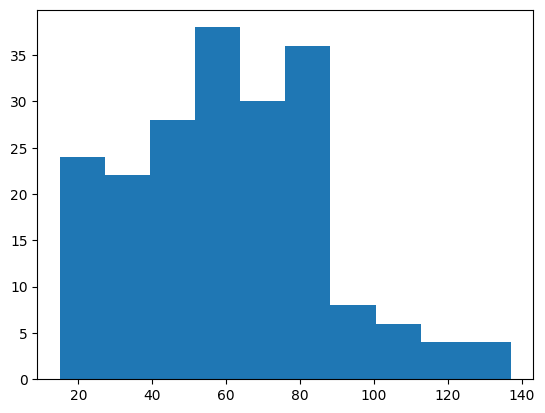

In [3]:
plt.hist(df['Annual Income (k$)'])

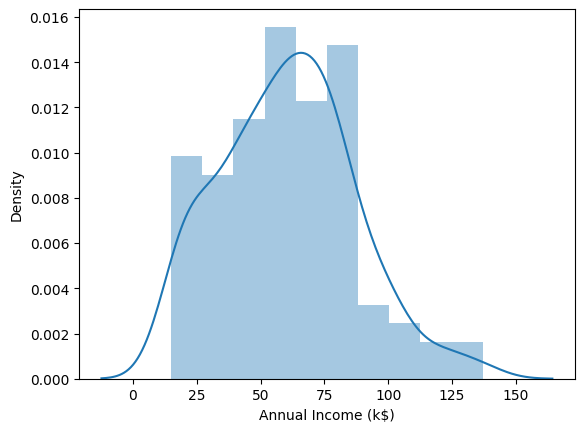

In [4]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

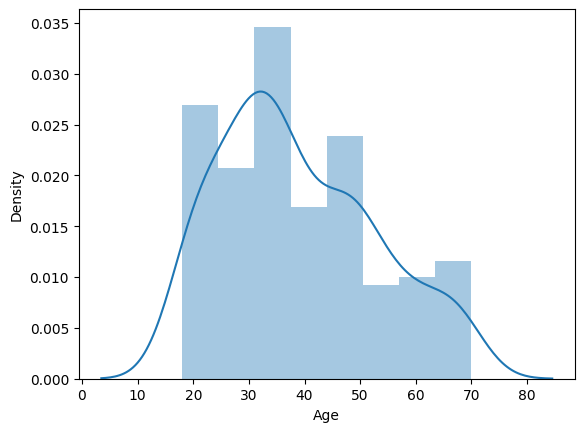

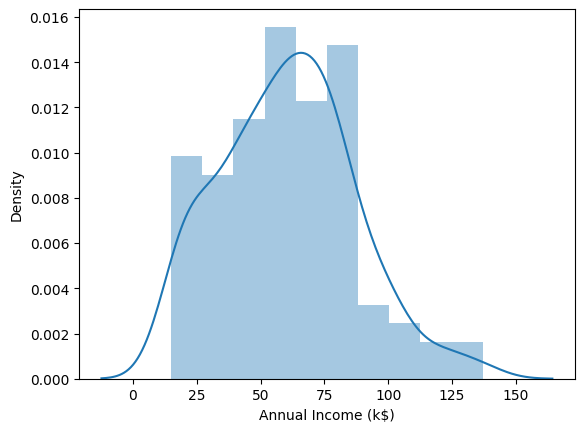

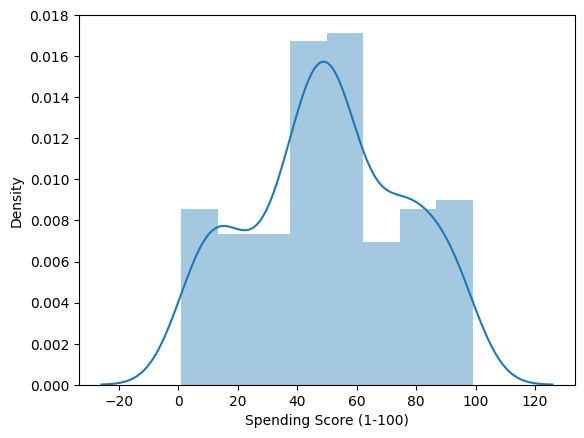

In [6]:
Columns=('Age', 'Annual Income (k$)','Spending Score (1-100)')
for i in Columns:
    sns.distplot(df[i])
    plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

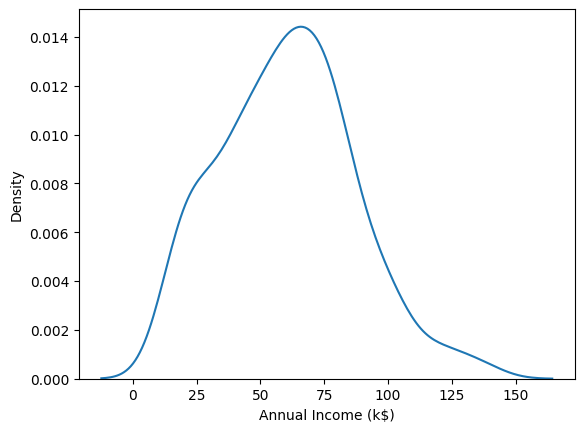

In [7]:
sns.kdeplot(df["Annual Income (k$)"])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

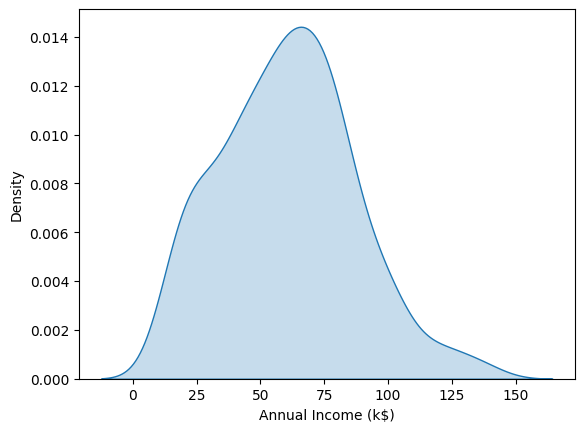

In [8]:
sns.kdeplot(df['Annual Income (k$)'],shade=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

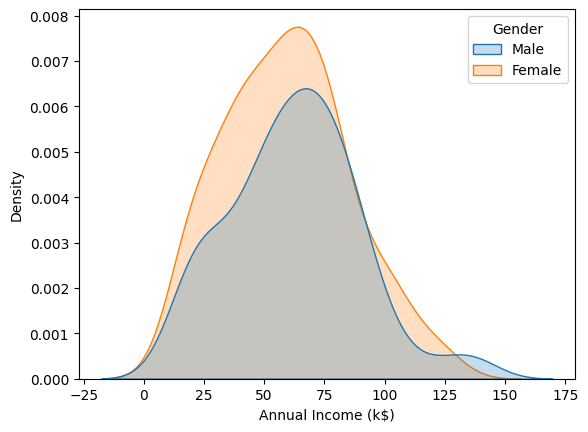

In [9]:
# sns.kdeplot(df['Annual Income (k$)'],shade=True , hue=df['Gender'])
# why is this not working tho?
# ok, so apprently, its becz thts how seaborn is made? like it wont regester if we dont specify "the data parameter nd directly use x,y and hue"....cuz its not a clean code??wow,ok.
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)

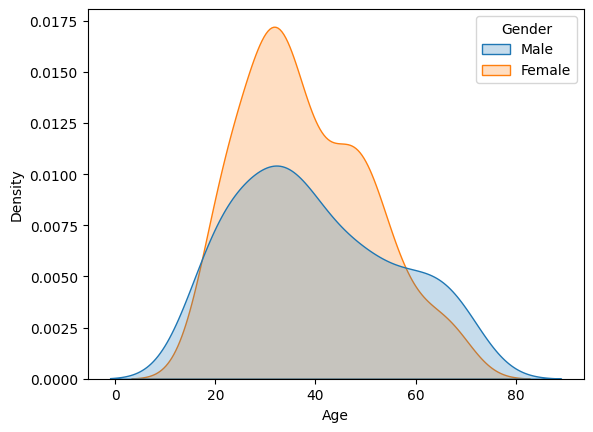

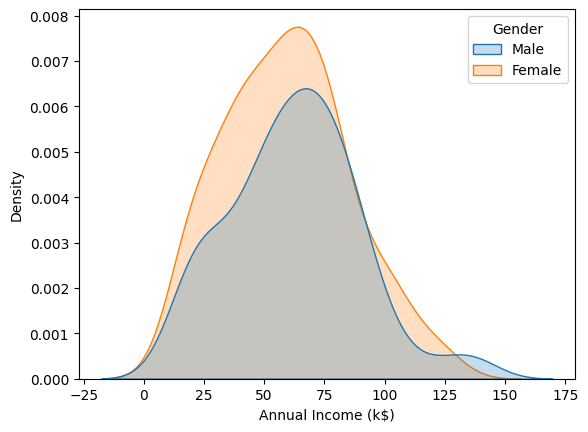

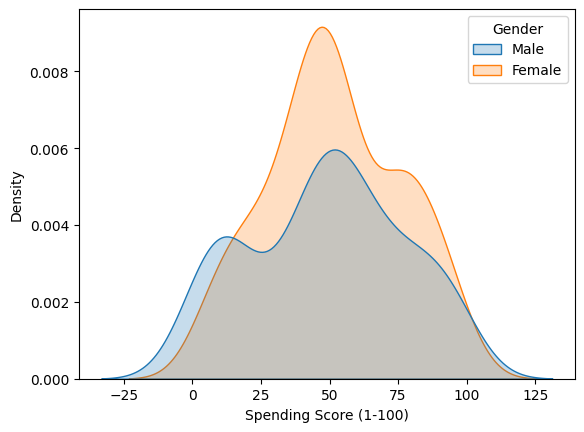

In [10]:
Columns=('Age', 'Annual Income (k$)','Spending Score (1-100)')
for i in Columns:
    sns.kdeplot(data=df, x=i, hue='Gender', shade=True)
    plt.show()

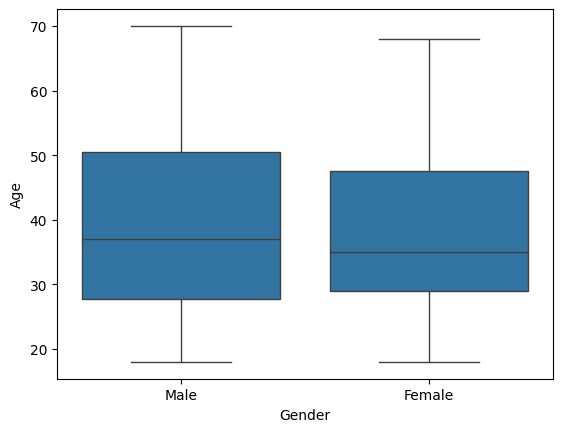

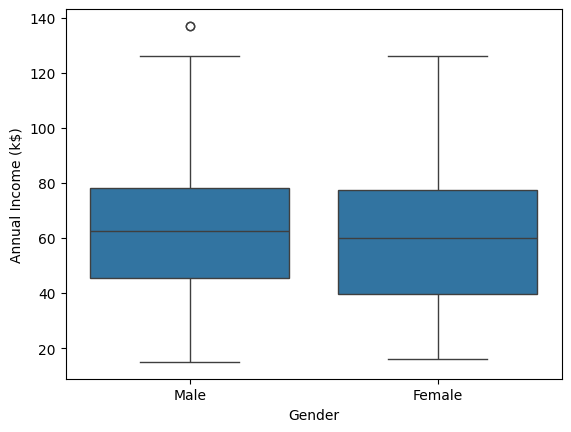

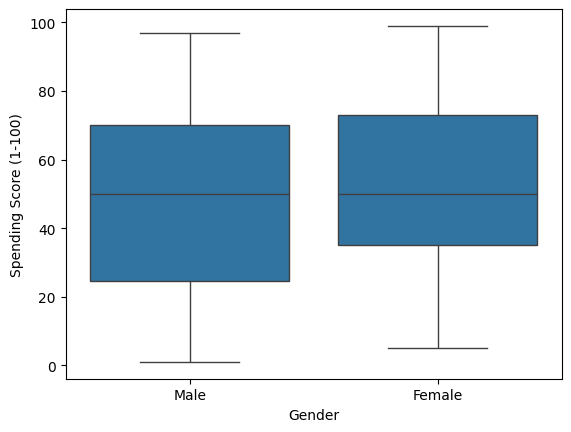

In [11]:
Columns=('Age', 'Annual Income (k$)','Spending Score (1-100)')
for i in Columns:
    sns.boxplot(data=df,x=df['Gender'],y=df[i])
    plt.show()


In [12]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [13]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

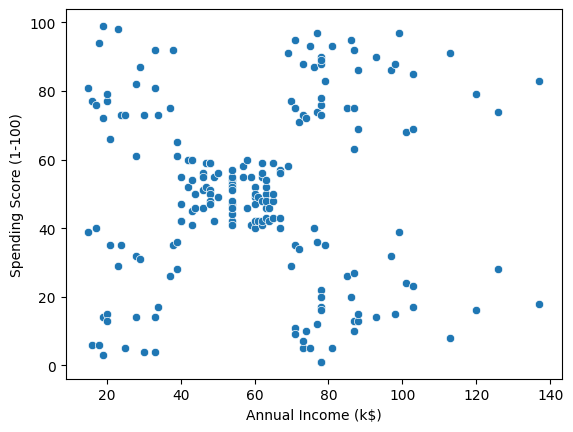

In [14]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

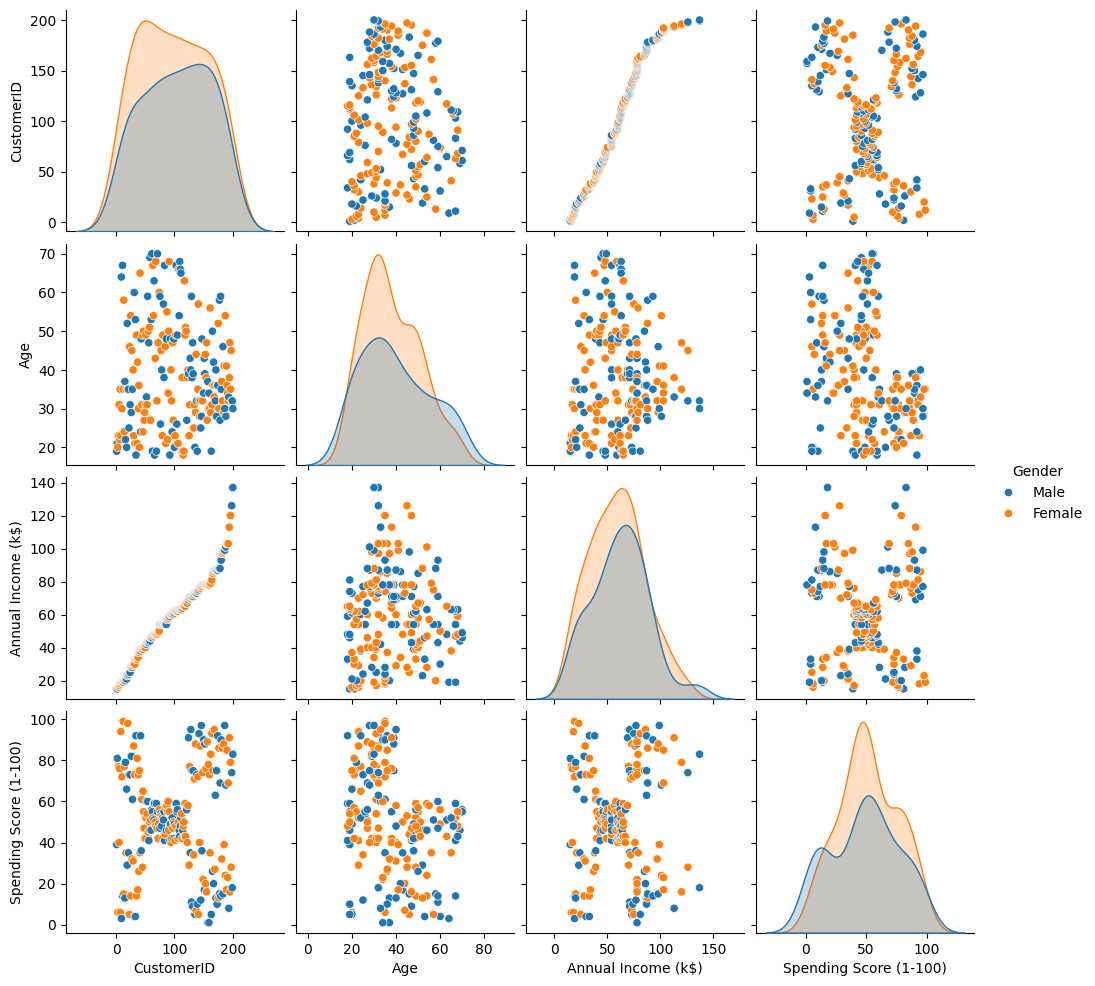

In [16]:
#sns.pairplot(df)
# Lets also drop CustomerID as its useless
# df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [17]:
df.groupby('Gender')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

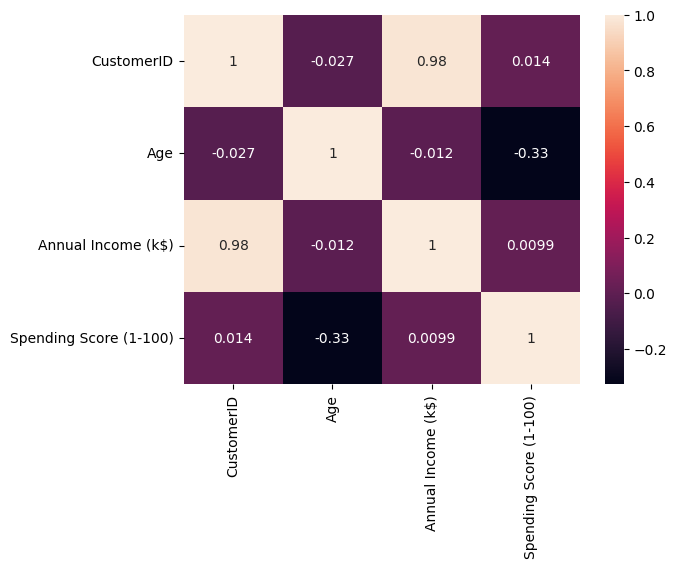

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Clustering - Univariate, Bivariate, Multivariate

In [20]:
# Univariate Clustering

In [21]:
inertia_scores = [] # Inertia is Within Cluster Sum of Squares or "DENSITY" of packed points.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_) # WCSS and inertia are the same concept

In [22]:
inertia_scores # It cana be observed tht wcss(Inertia) values decrease as more number of clusters are made.
# it just implies tht the points are closer to their respective cluster centroids .

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 14647.235170393054,
 9407.908188585605,
 5103.823725981627,
 4165.230194805196,
 2822.4996947496957,
 2217.640620490622,
 1799.5064935064938]

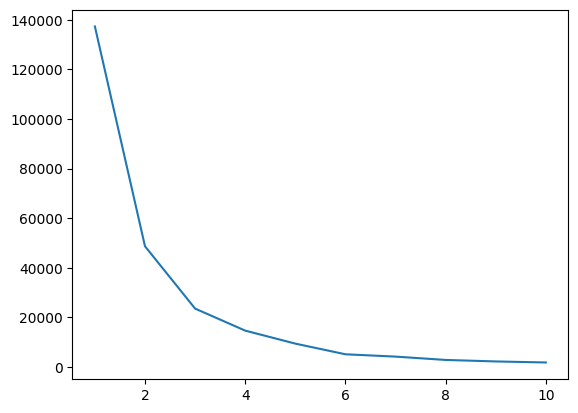

In [23]:
plt.plot(range(1,11),inertia_scores)
plt.show()
# Elobw is at 3

In [24]:
# Initiate, Fit, Predict/grab the labels

In [25]:
clustering1=KMeans(n_clusters=3)

In [26]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [27]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [28]:
df['Income Cluster']= clustering1.labels_

In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [30]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
2,92
1,86
0,22


In [31]:
clustering1.inertia_

25341.285871863212

In [32]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.545455,108.181818,52.000000
1,40.023256,36.348837,50.081395
2,38.065217,71.804348,49.880435


In [33]:
# Bivariant Clustering

In [34]:
# We 'CAN' scale our data here but we will just not do it cuz the data is similar in scale i.e Eucledian distance remains balanced almost..
# we can be little lineant like tht for bivarainte modelling
# but we HAVE to start scalling our data for multivariante clusteirng model as a good practice cuz otherwise some larger etric data will just dominate.

In [35]:
inertia_scores2 = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans.inertia_)

In [36]:
inertia_scores2

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37558.92202302528,
 31676.36973205365,
 29858.48359760394,
 26245.0756541585,
 20128.356320128114]

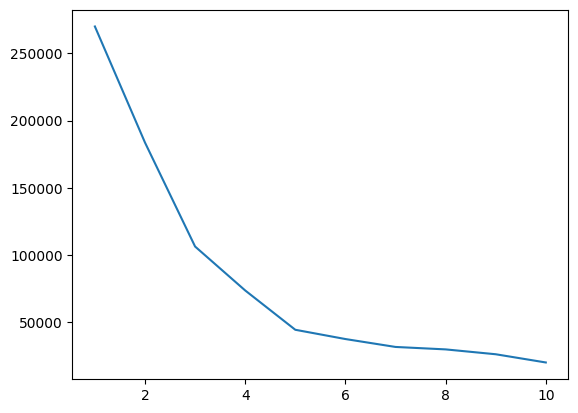

In [37]:
plt.plot(range(1,11),inertia_scores2)
plt.show()
# Elbow is at 5

In [38]:
clustering2=KMeans(n_clusters=5)

In [39]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [40]:
clustering2.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [41]:
df['Income and Spending Cluster']= clustering2.labels_

In [42]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,3
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,0,3
198,199,Male,32,137,18,0,0


In [43]:
clustering2.inertia_

44448.45544793369

In [44]:
df.groupby('Income and Spending Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Cluster,,,
0,41.114286,88.200000,17.114286
1,45.217391,26.304348,20.913043
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


In [45]:
clustering2.cluster_centers_

array([[88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [46]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns =['x','y']
centers

,x,y
0,88.200000,17.114286
1,26.304348,20.913043
2,55.296296,49.518519
3,86.538462,82.128205
4,25.727273,79.363636


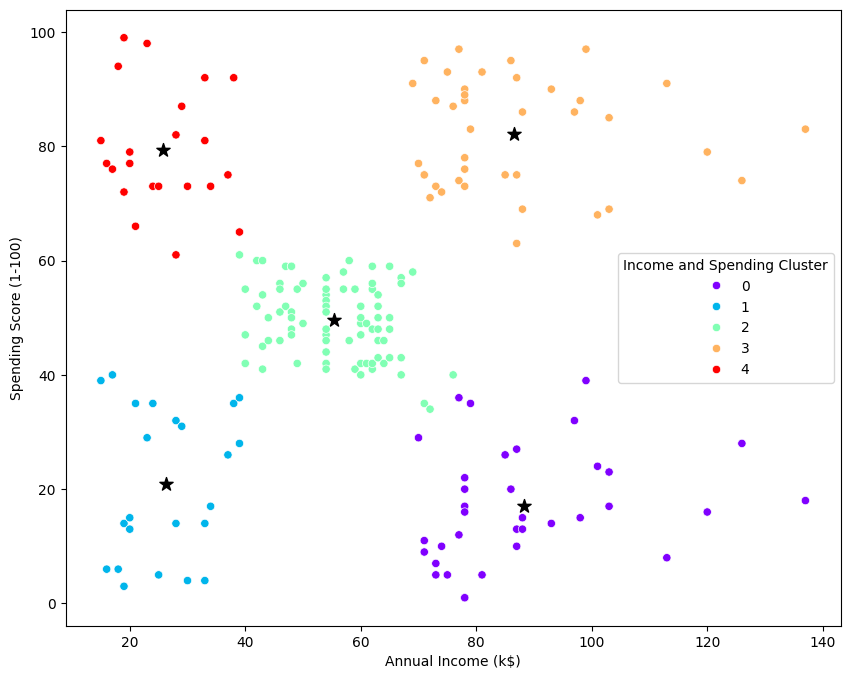

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],marker='*',s=100,c='black')
sns.scatterplot(data =df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Income and Spending Cluster",palette='rainbow')
plt.show()

In [48]:
pd.crosstab(df['Income and Spending Cluster'],df['Gender'],normalize='index') # wt normalize index does is it shows us the percentage of male and female.

Gender,Female,Male
Income and Spending Cluster,,
0,0.457143,0.542857
1,0.608696,0.391304
2,0.592593,0.407407
3,0.538462,0.461538
4,0.590909,0.409091


In [49]:
df.groupby('Income and Spending Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()
# here we can see tht cluster 0 and cluster 4 are our primary targets as they have more spending score.

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Cluster,,,
0,41.114286,88.200000,17.114286
1,45.217391,26.304348,20.913043
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


In [50]:
# Multivaraite Clustering

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scale=StandardScaler()

In [53]:
dff=pd.get_dummies(df,drop_first=True) # dropping first dummy column cuz we wont be need to columns for gender
dff['Gender_Male']=dff['Gender_Male'].astype(int)
dff

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster,Gender_Male
0,1,19,15,39,1,1,1
1,2,21,15,81,1,4,1
2,3,20,16,6,1,1,0
3,4,23,16,77,1,4,0
4,5,31,17,40,1,1,0
...,...,...,...,...,...,...,...
195,196,35,120,79,0,3,0
196,197,45,126,28,0,0,0
197,198,32,126,74,0,3,1
198,199,32,137,18,0,0,1


In [54]:
dff=dff[['Age', 'Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
dff

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [55]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


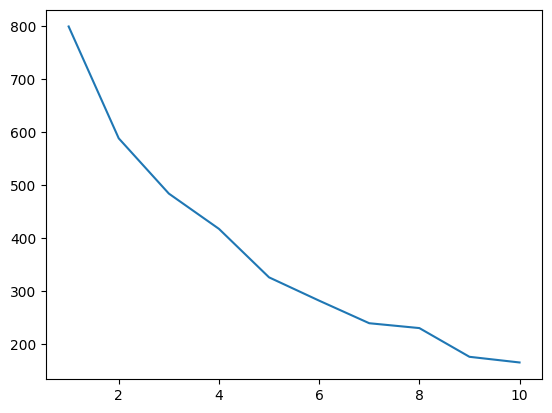

In [56]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)
# Elbow is at 4

In [57]:
clustering3=KMeans(n_clusters=4)

In [58]:
clustering3.fit(dff)

KMeans(n_clusters=4)

In [59]:
clustering3.labels_

array([2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 3, 2, 0, 3, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 3, 3, 0, 2, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2,
       3, 0, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 2, 0, 3, 0, 2, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 2, 3, 3, 0, 3, 0, 0, 2, 3, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2,
       3, 3, 1, 3, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 2], dtype=int32)

In [60]:
df['Complete Cluster']=clustering3.labels_

In [61]:
df.groupby('Complete Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Complete Cluster,,,
0,54.779661,46.372881,39.762712
1,41.264706,88.500000,16.764706
2,28.536585,61.804878,71.097561
3,29.772727,58.075758,63.772727


In [62]:
pd.crosstab(df['Complete Cluster'],df['Gender'],normalize='index') # wt normalize index does is it shows us the percentage of male and female.

Gender,Female,Male
Complete Cluster,,
0,0.542373,0.457627
1,0.411765,0.588235
2,0.000000,1.000000
3,1.000000,0.000000


In [63]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster,Complete Cluster
0,1,Male,19,15,39,1,1,2
1,2,Male,21,15,81,1,4,2
2,3,Female,20,16,6,1,1,3
3,4,Female,23,16,77,1,4,3
4,5,Female,31,17,40,1,1,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,3,3
196,197,Female,45,126,28,0,0,1
197,198,Male,32,126,74,0,3,2
198,199,Male,32,137,18,0,0,1
